In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 0])
x2 = np.array([15, 10])
p = [i for i in range(1, 15)]
dist =  []

for i in range(1, 15):
    dist.append(np.power(sum((abs(x1 - x2))**i), 1/i))
    
plt.plot(p, dist)
plt.xlabel('p')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [ ]:
import boto3
import pandas as pd
import numpy as np

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter7/Credit_Card_Clustering.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
credit_card = pd.read_csv(file_content_stream)

## Removing observation with NaN
credit_card = credit_card.dropna()
credit_card.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'brute').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'kd_tree').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'ball_tree').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_md = KMeans(n_clusters = 5, init = 'random', n_init = 20).fit(X)

## Extracting cluster labels
kmeans_md.labels_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Extracting cluster labels
kmeans_plus_plus_md.labels_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
CH_score = calinski_harabasz_score(X, kmeans_plus_plus_md.labels_)
CH_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
DB_score = davies_bouldin_score(X, kmeans_plus_plus_md.labels_)
DB_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
silhouette_score = silhouette_score(X, kmeans_plus_plus_md.labels_)
silhouette_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Defining the number of clusters to be considered
krange = list(range(2, 20))

## Defining lists to store scores
CH_scores, DB_scores, silhouette_scores = list(), list(), list() 

for i in krange:
    
    ## Here we define the k-means model
    cluster_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    cluster_assignments = cluster_md.labels_
    
    ## Here we extract CH, DB and silhoutte scores
    CH = calinski_harabasz_score(X, cluster_assignments)
    DB = davies_bouldin_score(X, cluster_assignments)
    silhouette = silhouette_score(X, cluster_assignments)
    
    ## Storing scores
    CH_scores.append(CH)
    DB_scores.append(DB)
    silhouette_scores.append(silhouette)
    
## Visualizing the scores    
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs[0].plot(krange, CH_scores)
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('CH-Score')
axs[0].grid()

axs[1].plot(krange, DB_scores)
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('DB-Score')
axs[1].grid()

axs[2].plot(krange, silhouette_scores)
axs[2].set_xlabel('Number of Clusters (k)')
axs[2].set_ylabel('Silhouette-Score')
axs[2].grid()

fig.savefig('chapter7_plot2.pdf')

In [ ]:
## Installing scikit-fuzzy 
pip install -U scikit-fuzzy

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from skfuzzy.cluster import cmeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting Fuzzy C-means with 5 clusters
fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 5, m = 1.25, error = 1e-6, maxiter = 1000)

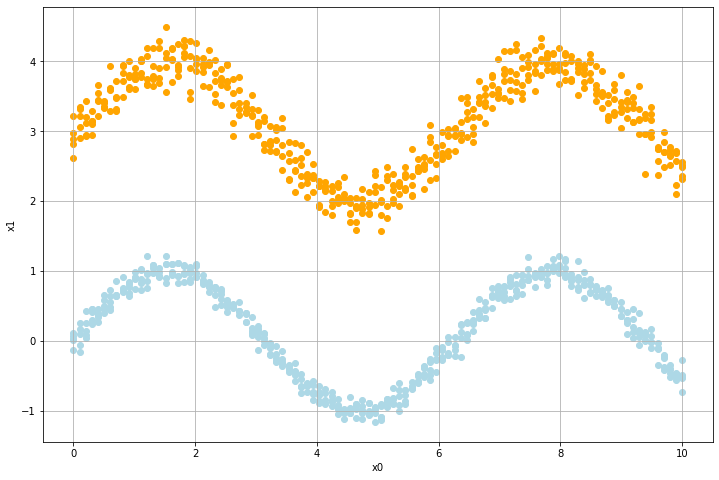

In [21]:
import pandas as pd
import numpy as np

x = np.linspace(start = 0, stop = 10, num = 100)
y1 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y2 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y3 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y4 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y5 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)

z1 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z2 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z3 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z4 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z5 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3


import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.scatter(x, y1, color = 'lightblue')
plt.scatter(x, y2, color = 'lightblue')
plt.scatter(x, y3, color = 'lightblue')
plt.scatter(x, y4, color = 'lightblue')
plt.scatter(x, y5, color = 'lightblue')

plt.scatter(x, z1, color = 'orange')
plt.scatter(x, z2, color = 'orange')
plt.scatter(x, z3, color = 'orange')
plt.scatter(x, z4, color = 'orange')
plt.scatter(x, z5, color = 'orange')

plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.savefig('chapter7_plot4.pdf')

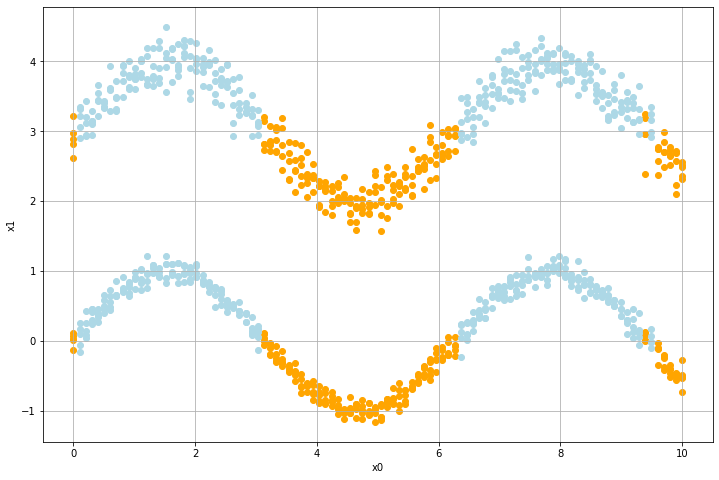

In [22]:
sine_dataset = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'y4': y4, 'y5': y5, 'z1': z1, 'z2': z2, 'z3': z3, 'z4': z4, 'z5': z5})

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Standardizing the data 
scaler = MinMaxScaler().fit(sine_dataset)
X = scaler.transform(sine_dataset)

## Fitting k-means with 2 clusters
kmeans_md = KMeans(n_clusters = 2, init = 'k-means++', n_init = 20).fit(X)

## Appending cluster to the sine dataset
sine_dataset['cluster'] = kmeans_md.labels_

## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12,8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['cluster'].unique():
        
        temp = sine_dataset[sine_dataset['cluster'] == c]
        plt.scatter(temp['x'], temp['y1'], color = colors[c])
        plt.scatter(temp['x'], temp['y2'], color = colors[c])
        plt.scatter(temp['x'], temp['y3'], color = colors[c])
        plt.scatter(temp['x'], temp['y4'], color = colors[c])
        plt.scatter(temp['x'], temp['y5'], color = colors[c])
        plt.scatter(temp['x'], temp['z1'], color = colors[c])
        plt.scatter(temp['x'], temp['z2'], color = colors[c])
        plt.scatter(temp['x'], temp['z3'], color = colors[c])
        plt.scatter(temp['x'], temp['z4'], color = colors[c])
        plt.scatter(temp['x'], temp['z5'], color = colors[c])

plt.savefig('chapter7_plot5.pdf')      

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


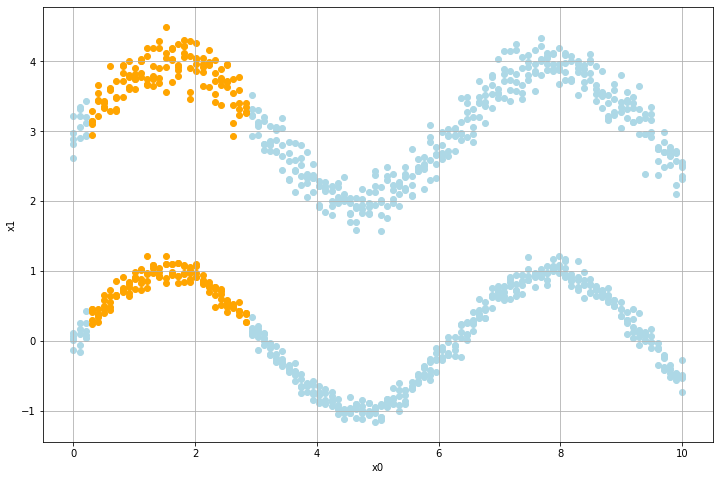

In [51]:
from sklearn.cluster import SpectralClustering 

## Fitting spectral clustering with 2 clusters
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors').fit(X)
# spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'rbf', gamma = 1, n_init = 20, n_components = 11).fit(X)
print(spectral_clustering.labels_)

## Appending cluster to the sine dataset
sine_dataset['spectral_cluster'] = spectral_clustering.labels_

## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_cluster'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_cluster'] == c]
        plt.scatter(temp['x'], temp['y1'], color = colors[c])
        plt.scatter(temp['x'], temp['y2'], color = colors[c])
        plt.scatter(temp['x'], temp['y3'], color = colors[c])
        plt.scatter(temp['x'], temp['y4'], color = colors[c])
        plt.scatter(temp['x'], temp['y5'], color = colors[c])
        plt.scatter(temp['x'], temp['z1'], color = colors[c])
        plt.scatter(temp['x'], temp['z2'], color = colors[c])
        plt.scatter(temp['x'], temp['z3'], color = colors[c])
        plt.scatter(temp['x'], temp['z4'], color = colors[c])
        plt.scatter(temp['x'], temp['z5'], color = colors[c])


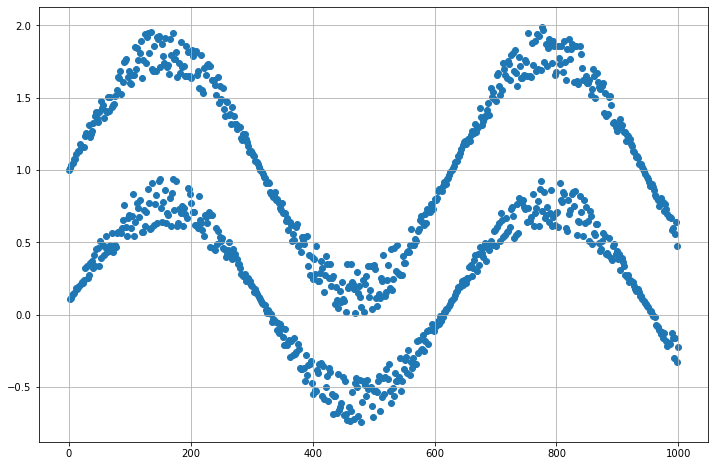

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

nb_samples = 1000
X = np.zeros(shape = (nb_samples, 2))

sine_dataset = pd.DataFrame(X)

for i in range(nb_samples):
    X[i, 0] = float(i)
    
    if i % 2 == 0:
        X[i, 1] = 1.0 + (np.random.uniform(0.65, 1.0))*np.sin(float(i) / 100.0)
    else:
        X[i, 1] = 0.1 + (np.random.uniform(0.5, 0.85))*np.sin(float(i) / 100.0)

import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.show()        

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


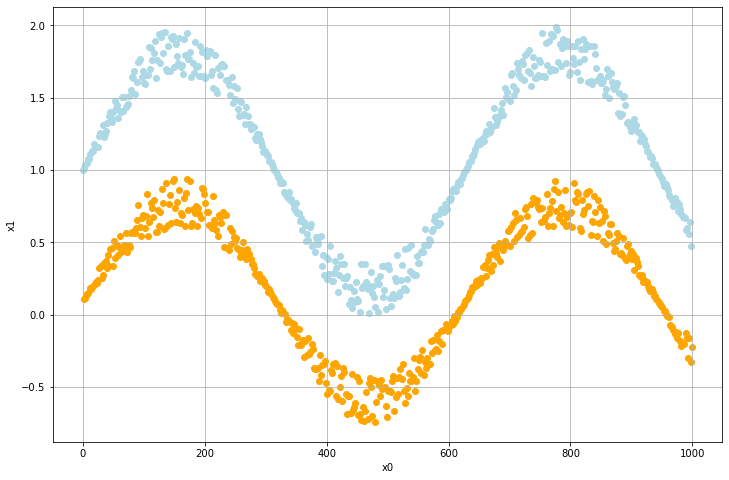

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting spectral clustering with 2 clusters
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors').fit(X)
spectral_clustering.labels_

## Appending cluster to the sine dataset
sine_dataset.loc[:, '2'] = spectral_clustering.labels_
sine_dataset.columns = ['x', 'y', 'cluster']

## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['cluster'].unique():
        
        temp = sine_dataset[sine_dataset['cluster'] == c]
        plt.scatter(temp['x'], temp['y'], color = colors[c])
        